In [1]:
import psycopg2
 
# Conexão com o banco
conn = psycopg2.connect(
    host="10.77.77.29",       # ou IP do servidor
    port="5432",            # padrão do PostgreSQL
    database="ginseng",
    user="joaoherculano",
    password="Ginseng@"
)
 
# Criar um cursor para executar comandos SQL
cur = conn.cursor()

In [2]:
import pandas as pd
 
query = '''
select
	*,
	CASE
	    WHEN dayswithoutsales BETWEEN 40 AND 59 THEN 'mais de 40 dias'
	    WHEN dayswithoutsales BETWEEN 60 AND 79 THEN 'mais de 60 dias'
	    WHEN dayswithoutsales BETWEEN 80 AND 99 THEN 'mais de 80 dias'
	    WHEN dayswithoutsales >= 100 THEN 'acima de 100 dias'
    	ELSE 'menos de 40 dias' 
	end as status_venda,
	pricesellin * (stock_actual + stock_intransit) AS valor_estoque_parado
from "public"."draft"
where dayswithoutsales > 40 
and deactivation = '' 
and stock_actual > 0 
and isproductdeactivated is not null 
and currentcyclesales = 0
'''
df = pd.read_sql(query, conn)
 
df.head()

C:\Users\joao.herculano\AppData\Local\Temp\ipykernel_109208\760475755.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


loja_id   code                               description launch  \
0   20997  48359                          ZAAD EDP 50ml V2          
1   20997  48789      THE BLEND DES ANTIT AER 75g/125ml V3          
2   20997  70693                  SOPHIE LOC HID CPO 200ml          
3   20997  75921               SOPHIE BATOM ROSA PINK 3,3g          
4   20997  53410  REF NSPA SAB LIQ CPO PERF AMEI/NEG 200ml          

  deactivation  thirdtolastcyclesales  secondtolastcyclesales  lastcyclesales  \
0                                   0                       1               0   
1                                   1                       0               0   
2                                   0                       2               0   
3                                   1                       1               0   
4                                   0                       0               0   

   currentcyclesales  nextcycleprojection  ...  criticalitem_blockedwallet  \
0                  0                    2  ...                       False   
1                  0                    1  ...                       False   
2                  0                    3  ...                       False   
3                  0                    3  ...                       False   
4                  0                    6  ...                       False   

   criticalitem_iscritical         codsubcategory  isproductdeactivated  \
0                    False   PERFUMARIA MASCULINA                 False   
1                    False  DESODORANTE MASCULINO                 False   
2                    False   CUIDADOS COM O CORPO                 False   
3                    False              MAQUIAGEM                 False   
4                    False                  CORPO                 False   

   brandgroupcode  dayswithoutsales  coveragedays hascoverage  \
0             BOT                54            20       False   
1             BOT                72            25        True   
2             BOT                48             4       False   
3             BOT                53            15       False   
4             BOT               135            31        True   

        status_venda valor_estoque_parado  
0    mais de 40 dias               168.09  
1    mais de 60 dias                12.37  
2    mais de 40 dias                11.41  
3    mais de 40 dias                16.58  
4  acima de 100 dias                85.12  

[5 rows x 34 columns]

In [3]:
cur.close()
conn.close()

In [4]:
df.columns

Index(['loja_id', 'code', 'description', 'launch', 'deactivation',
       'thirdtolastcyclesales', 'secondtolastcyclesales', 'lastcyclesales',
       'currentcyclesales', 'nextcycleprojection',
       'secondtonextcycleprojection', 'stock_actual', 'stock_intransit',
       'purchasesuggestion', 'smartpurchase_purchasesuggestioncycle',
       'smartpurchase_nextcyclepurchasesuggestion', 'pendingorder',
       'salescurve', 'promotions_description', 'promotions_discountpercent',
       'pricesellin', 'businessunit', 'codcategory',
       'criticalitem_dtprovidedregularization', 'criticalitem_blockedwallet',
       'criticalitem_iscritical', 'codsubcategory', 'isproductdeactivated',
       'brandgroupcode', 'dayswithoutsales', 'coveragedays', 'hascoverage',
       'status_venda', 'valor_estoque_parado'],
      dtype='object')

In [5]:
import matplotlib as plt
import seaborn as sns

In [6]:
df['estoque futuro'] = df['stock_actual'] + df['stock_intransit']

In [7]:
pdvs = pd.read_excel(r"C:\Users\joao.herculano\GRUPO GINSENG\Assistência Suprimentos - 2025\SUPRIMENTOS\DB_PROMOÇÕES\BOTICARIO\C08\arquivos pra gerar a previsão\pdvs\pdvs.xlsx")

In [8]:
df['loja_id'] = df['loja_id'].astype('Int64')

In [9]:
pdvs['PDV'] = pdvs['PDV'].astype('Int64')

In [10]:
df2= pd.merge(left=df,right=pdvs[['PDV','UF']],left_on='loja_id',right_on='PDV',how='inner')

In [11]:
df2

loja_id   code                               description launch  \
0       20997  48359                          ZAAD EDP 50ml V2          
1       20997  48789      THE BLEND DES ANTIT AER 75g/125ml V3          
2       20997  70693                  SOPHIE LOC HID CPO 200ml          
3       20997  75921               SOPHIE BATOM ROSA PINK 3,3g          
4       20997  53410  REF NSPA SAB LIQ CPO PERF AMEI/NEG 200ml          
...       ...    ...                                       ...    ...   
3437    20997  82845          MATCH COND LISO PROLONGADO 280ml          
3438    20997  49093            MATCH AMP CAP PREENCHEDORA 9ml          
3439    20997  50165                MALBEC SHW GEL CAB/CPO 75g          
3440    20997  59017          MALBEC LOC DES HID CPO MATE 75ml          
3441    20997  56000                         PMPCK MEN CABELOS          

     deactivation  thirdtolastcyclesales  secondtolastcyclesales  \
0                                      0                       1   
1                                      1                       0   
2                                      0                       2   
3                                      1                       1   
4                                      0                       0   
...           ...                    ...                     ...   
3437                                   3                       0   
3438                                   1                       0   
3439                                   0                       0   
3440                                   0                       0   
3441                                   1                       1   

      lastcyclesales  currentcyclesales  nextcycleprojection  ...  \
0                  0                  0                    2  ...   
1                  0                  0                    1  ...   
2                  0                  0                    3  ...   
3                  0                  0                    3  ...   
4                  0                  0                    6  ...   
...              ...                ...                  ...  ...   
3437               0                  0                    2  ...   
3438               0                  0                    1  ...   
3439               0                  0                    1  ...   
3440               0                  0                    1  ...   
3441               0                  0                    1  ...   

      isproductdeactivated  brandgroupcode  dayswithoutsales  coveragedays  \
0                    False             BOT                54            20   
1                    False             BOT                72            25   
2                    False             BOT                48             4   
3                    False             BOT                53            15   
4                    False             BOT               135            31   
...                    ...             ...               ...           ...   
3437                 False             BOT                66            28   
3438                 False             BOT                66            18   
3439                 False             BOT               157            17   
3440                 False             BOT                89            34   
3441                 False             BOT                43            71   

      hascoverage       status_venda  valor_estoque_parado estoque futuro  \
0           False    mais de 40 dias                168.09              3   
1            True    mais de 60 dias                 12.37              1   
2           False    mais de 40 dias                 11.41              1   
3           False    mais de 40 dias                 16.58              2   
4            True  acima de 100 dias                 85.12              7   
...           ...                ...                   ...            ...   
3437   

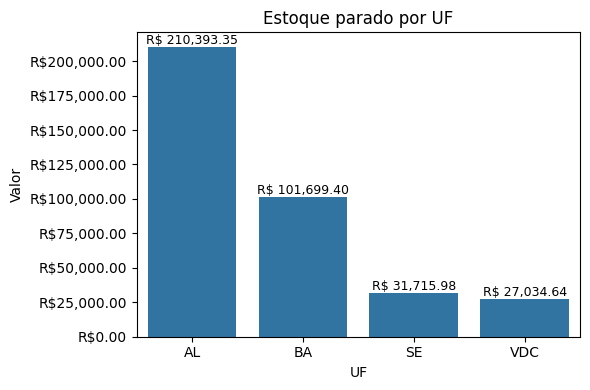

In [12]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

# Agrupa corretamente e transforma em DataFrame
df_plot = df2.groupby('UF')['valor_estoque_parado'].sum().reset_index()

plt.figure(figsize=(6, 4))
ax = sns.barplot(data=df_plot, x='UF', y='valor_estoque_parado', errorbar=None)

ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('R${x:,.2f}'))

# Adiciona os valores no topo de cada barra
for p in ax.patches:
    valor = p.get_height()
    ax.annotate(f'R$ {valor:,.2f}', (p.get_x() + p.get_width() / 2, valor),
                ha='center', va='bottom', fontsize=9)

plt.title("Estoque parado por UF")
plt.ylabel("Valor")
plt.xlabel("UF")
plt.tight_layout()
plt.show()


In [13]:
# enviar_email_excel.py

import pandas as pd
import smtplib
import ssl
from email.message import EmailMessage
from email.utils import make_msgid
from email.mime.image import MIMEImage
from pathlib import Path
import configparser
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

# 0. Ler configurações do arquivo INI
config = configparser.ConfigParser()
config.read("config.ini")

remetente = config['credenciais']['remetente']
senha = config['credenciais']['senha']
destinatarios = [email.strip() for email in config['email']['destinatarios'].split(',')]
assunto = config['email']['assunto']

# 1. Criar dados fictícios e gerar Excel
df = pd.DataFrame({
    'Nome': ['Ana', 'Bruno', 'Carlos'],
    'Idade': [28, 34, 45],
    'Email': ['ana@example.com', 'bruno@example.com', 'carlos@example.com'],
    'UF': ['SP', 'RJ', 'SP'],
    'valor_estoque_parado': [12000, 8000, 15000]
})

excel_path = Path("relatorio.xlsx")
df.to_excel(excel_path, index=False)

# 2. Criar e salvar gráfico
plot_df = df.groupby('UF')['valor_estoque_parado'].sum().reset_index()
plt.figure(figsize=(6, 4))
ax = sns.barplot(data=plot_df, x='UF', y='valor_estoque_parado', errorbar=None)
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('R${x:,.2f}'))
for p in ax.patches:
    valor = p.get_height()
    ax.annotate(f'R$ {valor:,.2f}', (p.get_x() + p.get_width() / 2, valor),
                ha='center', va='bottom', fontsize=9)
plt.title("Estoque parado por UF")
plt.ylabel("Valor em Reais")
plt.xlabel("UF")
plt.tight_layout()
plt.savefig("grafico.png")
plt.close()

# 3. Criar e-mail com imagem embutida
grafico_cid = make_msgid()[1:-1]  # remove < >
msg = EmailMessage()
msg['From'] = remetente
msg['To'] = ', '.join(destinatarios)
msg['Subject'] = assunto

html_email = f"""
<html>
  <body>
    <p>Prezados,</p>
    <p>Segue em anexo o relatório em Excel conforme solicitado.</p>
    <p><b>Resumo gráfico:</b></p>
    <img src="cid:{grafico_cid}"><br>
    <p>Atenciosamente,<br>Equipe de Dados</p>
  </body>
</html>
"""

msg.set_content("Seu e-mail precisa de um visualizador HTML.")
msg.add_alternative(html_email, subtype='html')

# 4. Anexar gráfico inline
with open("grafico.png", 'rb') as img:
    msg.get_payload()[1].add_related(img.read(), 'image', 'png', cid=grafico_cid)

# 5. Anexar o Excel
with open(excel_path, 'rb') as f:
    msg.add_attachment(
        f.read(),
        maintype='application',
        subtype='vnd.openxmlformats-officedocument.spreadsheetml.sheet',
        filename=excel_path.name
    )

# 6. Enviar o e-mail via SMTP Outlook com configurações fornecidas
with smtplib.SMTP('smtp-mail.outlook.com', 587) as smtp:
    smtp.ehlo()
    smtp.starttls(context=ssl.create_default_context())
    smtp.login(remetente, senha)
    smtp.send_message(msg)

print("E-mail enviado com sucesso.")


KeyError: 'credenciais'

In [ ]:
df2['valor_estoque_parado']